<a href="https://colab.research.google.com/github/sedgwickc/neural-networks-and-deep-learning/blob/master/colab_keras/MNIST_CNN_Artifacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Neural Networks for Handwritten Digit Recognition in the Presence of Artifacts: Further Experiments

This notebook generates the results presented in the blog post found here. 

The the experiments in this notebook reproduce and build on those previously run, outlined [here](https://charlessedgwick.com/2020/08/18/exploring-neural-networks-for-handwritten-digit-recognition-in-the-presence-of-artifacts-methods-and-results/), using Micheal Nielsens python code written from scrath for digit classification using the MNIST data set. 

The conversion to Keras was done using [this](https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb) notebook by Daniel Moser as a reference.

In [3]:
%matplotlib inline

# required imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# load training data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# creat validation data set of 10000 images from training set
image_indexes = random.sample(range(x_train.shape[0]), 10000)
x_valid = x_train.take(image_indexes, axis=0)
x_train = np.delete(x_train, image_indexes, 0)

y_valid = y_train.take(image_indexes)
y_train = np.delete(y_train, image_indexes, 0)



11493376/11490434 [==============================] - 0s 0us/step


In [28]:
#inspect data
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_valid shape: ", x_valid.shape)
print("y_valid shape: ", y_valid.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 28, 28)
y_train shape:  (50000,)
x_valid shape:  (10000, 28, 28)
y_valis shape:  (10000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [10]:
# create artifact training sets
def generate_artifact_set(ratio_images, ratio_artifacts, images):
  percent_imgs = math.ceil(ratio_images * 100)
  percent_art = math.ceil(ratio_artifacts * 100)
  print("Creating artifact set with "+ str(percent_imgs)+ "% of images with "+str(percent_art)+"% of each image made up of artifacts")

  images_artifact = np.copy(images)

  # determine and store number of images to alter
  num_images = math.ceil(images_artifact.shape[0] * ratio_images)

  rand_image_indeces = random.sample(range(0,images_artifact.shape[0]), num_images)

  for j in rand_image_indeces:
    # randomly sample pixels
    artifact_pixels = random.sample(range(784), int(784*ratio_artifacts))
    # turn sampled pixels into artifacts
    for i in artifact_pixels:
      x = (i // 28) - 1
      y = (i % 28) 
      images_artifact[j][x,y] = random.randint(0, 255)
  return images_artifact

# create artifact training  data set 
x_train_artifact_50_30 = generate_artifact_set(.5, .3, x_train)



Creating artifact set with 50% of images with 30% of each image made up of artifacts


100 random digits from training artifact 50 30 data: 


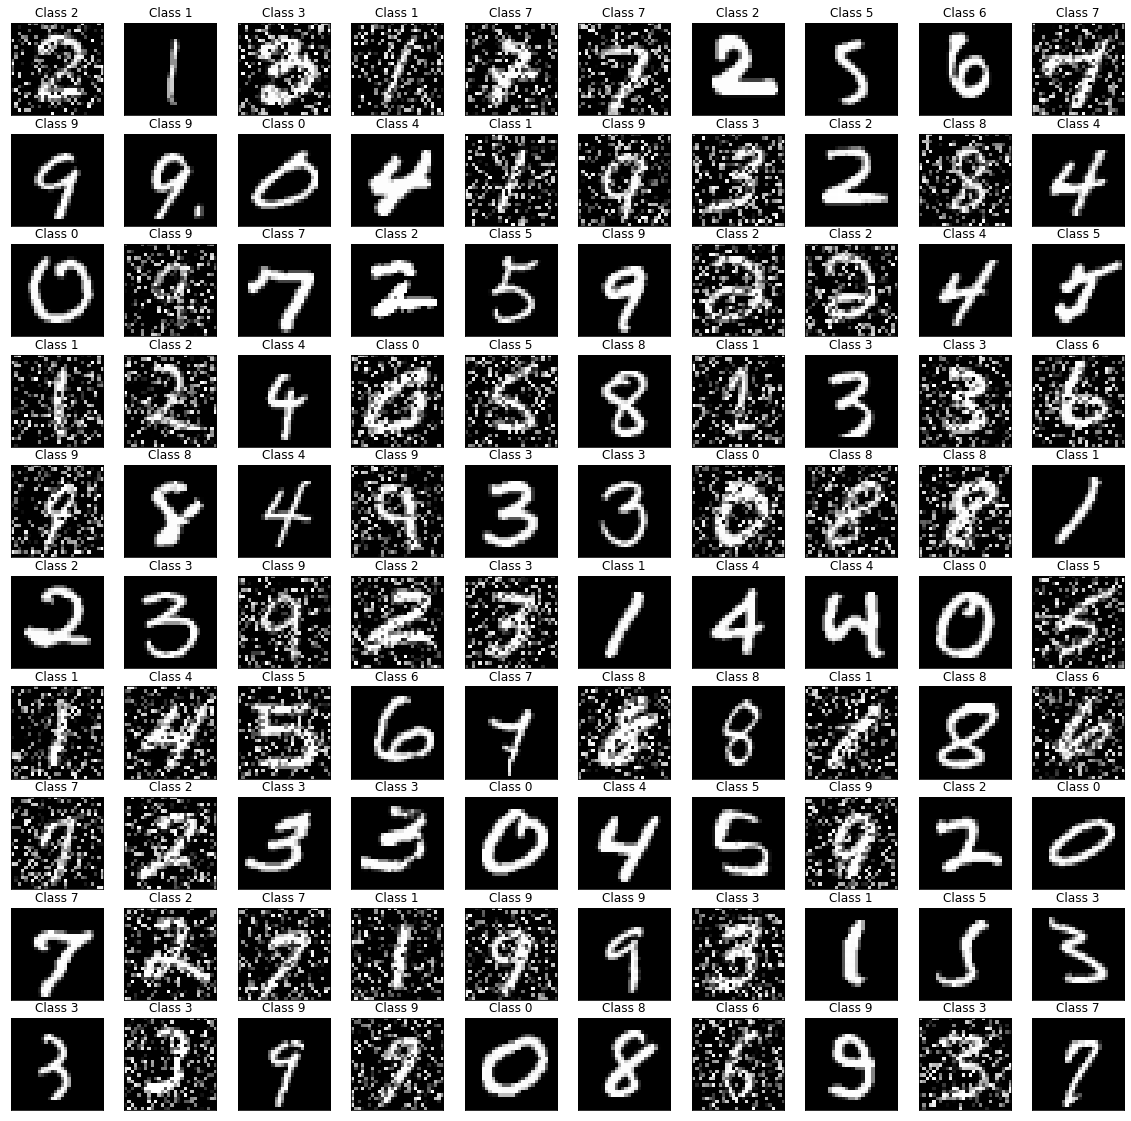

100 random digits from training data:


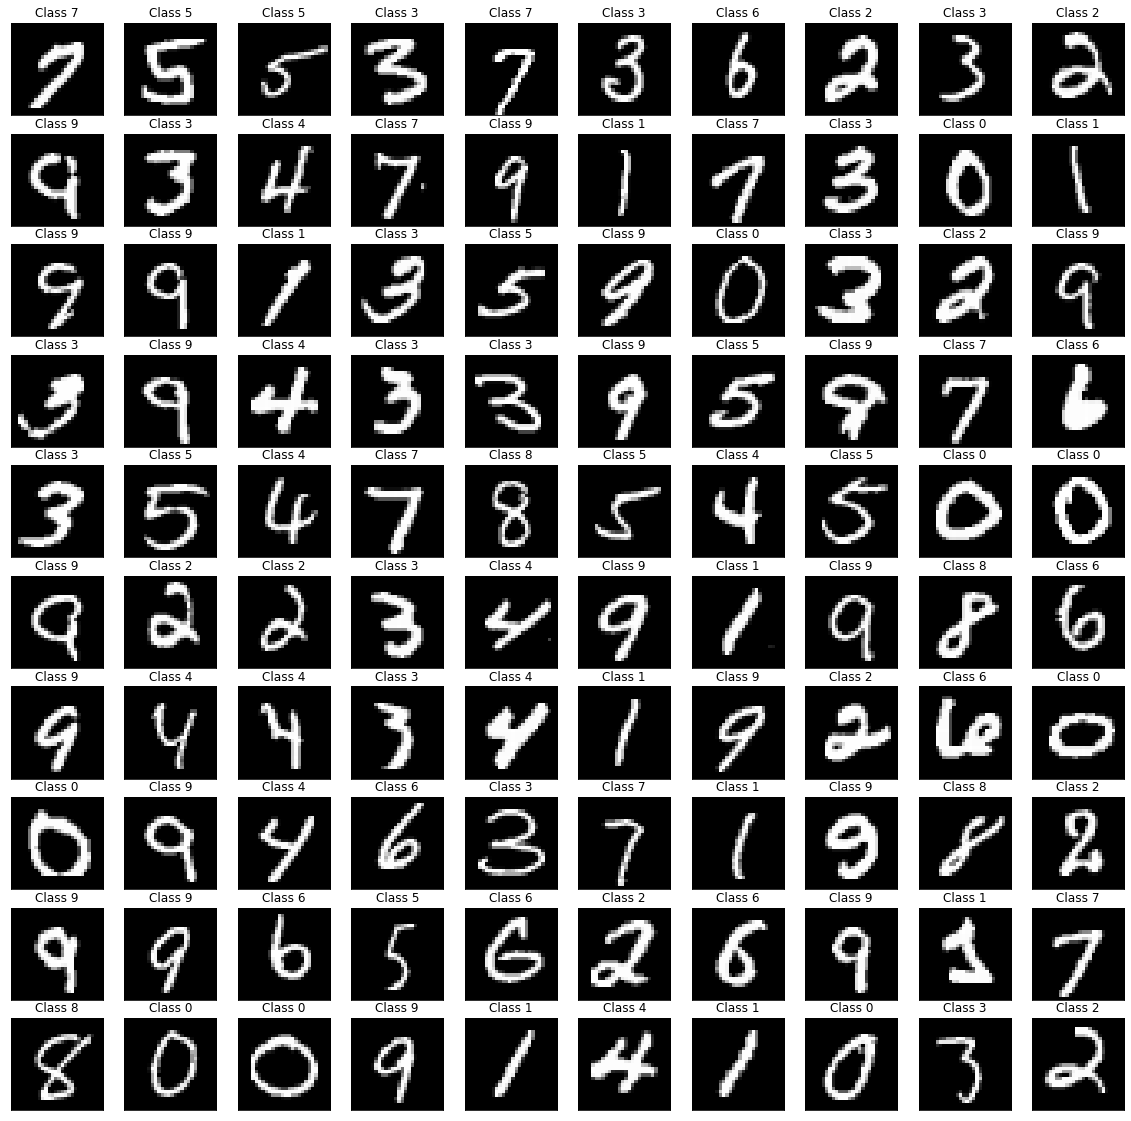

100 random digits from validation data: 


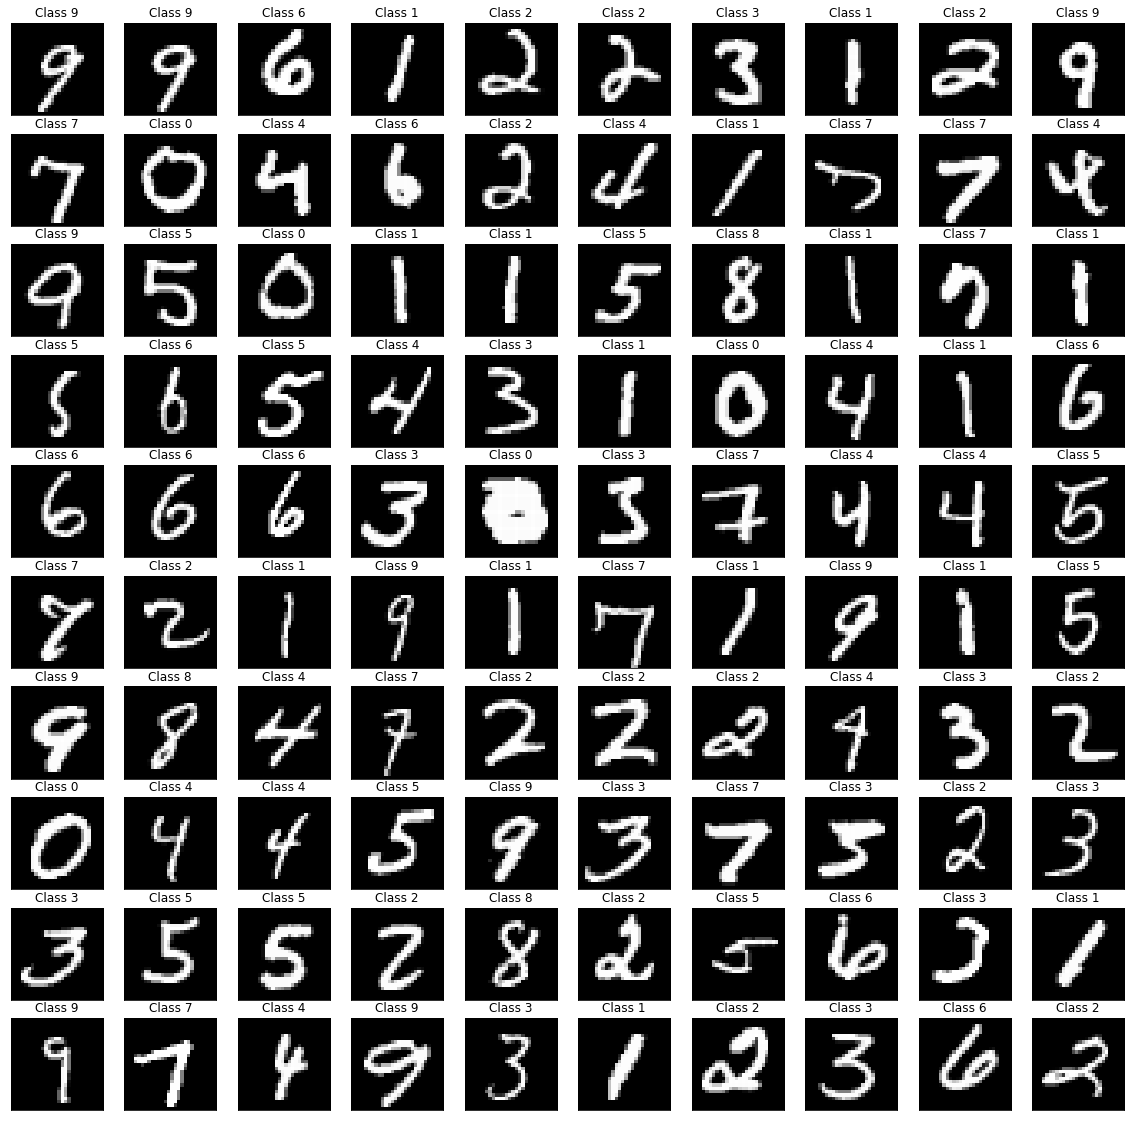

In [11]:
# plot some training data

def plot_100_random_digits(images, labels):

  plt.rcParams['figure.figsize'] = (20,20)

  for i in range(100):
    plt.subplot(10,10,i+1)
    num = random.randint(0, len(images))
    plt.imshow(images[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(labels[num]))
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
  plt.show()

print("100 random digits from training artifact 50 30 data: ")
plot_100_random_digits(x_train_artifact_50_30, y_train)

print("100 random digits from training data:")
plot_100_random_digits(x_train, y_train)

print("100 random digits from validation data: ")
plot_100_random_digits(x_valid, y_valid)



In [ ]:
# create artifact datasets